GARMENT WORKER PRODUCTIVITY ANALYSIS

Muhammad Bagaswara Sarendra

MSIB Capstone Project at Cepat Cakap Studi Independen Data Scientist 2024

LIFE CYCLE OF MACHINE LEARNING PROJECT

Data Collection And Data Understanding  
Data Cleaning  
Exploratory Data Analysis  
Data Preprocessing  
Modelling And Evaluation  
Hyperparameter Tuning  

Data Collection and Data Understanding


Source: https://www.kaggle.com/datasets/ishadss/productivity-prediction-of-garment-employees

This data consists of 1197 rows and 14 columns

Import Required Packages and Dataset

In [1]:
# Data Analysis and Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

# Feature Selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb
from xgboost import XGBRegressor
import lightgbm as lgb
import catboost as cb
from catboost import CatBoostRegressor

# Multicollinearity Check
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Hyperparameter Tuning and Model Evaluation
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Define the URL where the CSV file is located

In [2]:
url = 'https://raw.githubusercontent.com/bagassarendra/GarmentWorkerProductivity-CapstoneProject/refs/heads/main/garments_worker_productivity.csv'

Load data into a DataFrame from a CSV file at the given URL

In [4]:
dataset = pd.read_csv(url)

Display the first few rows of the dataset to verify it loaded correctly

In [6]:
dataset.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


Check the structure and dimensions of the dataset

In [7]:
dataset.shape

(1197, 15)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [9]:
dataset.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


Identify numerical and categorical columns

In [10]:
categorical_columns = dataset.select_dtypes(include=['object', 'category']).columns
numerical_columns = dataset.select_dtypes(include=['int64', 'float64']).columns

print("Kolom Kategorikal:")
print(categorical_columns)
print("\nKolom Numerik:")
print(numerical_columns)

Kolom Kategorikal:
Index(['date', 'quarter', 'department', 'day'], dtype='object')

Kolom Numerik:
Index(['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'actual_productivity'],
      dtype='object')


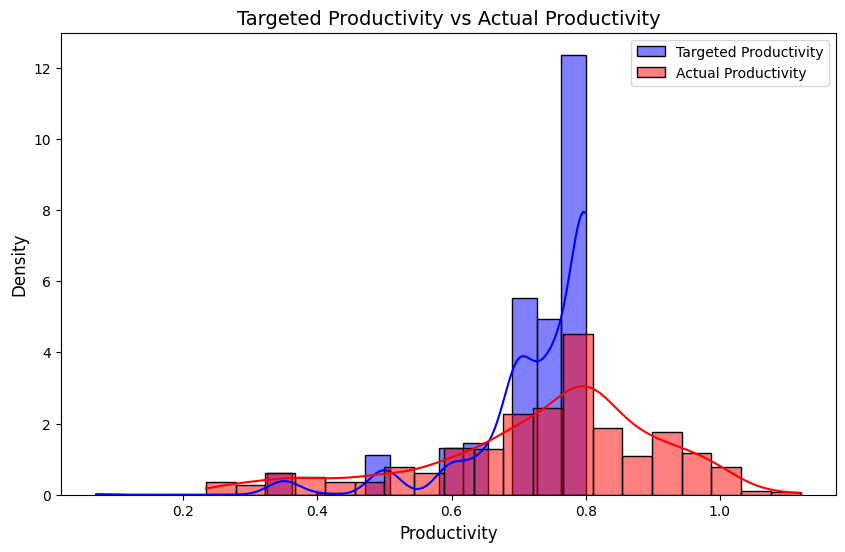

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(dataset['targeted_productivity'], kde=True, color='blue', label='Targeted Productivity', stat='density', bins=20)
sns.histplot(dataset['actual_productivity'], kde=True, color='red', label='Actual Productivity', stat='density', bins=20)
plt.title('Targeted Productivity vs Actual Productivity', fontsize=14)
plt.xlabel('Productivity', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.show()

There is a very strong correlation between the targeted activity and the actual variable, indicating that an increase in one variable is directly proportional to an increase in the other.

Data Cleaning

Checking Unique Values

In [13]:
dataset.nunique()

date                      59
quarter                    5
department                 3
day                        6
team                      12
targeted_productivity      9
smv                       70
wip                      548
over_time                143
incentive                 48
idle_time                 12
idle_men                  10
no_of_style_change         3
no_of_workers             61
actual_productivity      879
dtype: int64

In [14]:
print(dataset['department'].unique())
print(dataset['quarter'].unique())

['sweing' 'finishing ' 'finishing']
['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']


I found unique values that need to be corrected in the 'quarter' and 'department' variables. In the 'quarter' variable, the values were calculated up to Q5, but I changed it to only Q4. As for the 'department' variable, there were occurrences of 'finishing' and 'finishing ' (with a space at the end), which need to be adjusted.

In [15]:
dataset = dataset.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
dataset['quarter'] = dataset['quarter'].replace('Quarter5', 'Quarter4')
dataset['department'] = dataset['department'].replace('sweing', 'sewing')

Additionally, I also corrected the word 'sweing' to 'sewing'.

In [16]:
print(dataset['department'].unique())
print(dataset['quarter'].unique())

['sewing' 'finishing']
['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4']


In [17]:
dataset['department'].value_counts()

department
sewing       691
finishing    506
Name: count, dtype: int64

In [18]:
dataset['quarter'].value_counts()

quarter
Quarter1    360
Quarter2    335
Quarter4    292
Quarter3    210
Name: count, dtype: int64

Checking and Handling Missing Value

In [19]:
dataset.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [20]:
dataset['wip'] = dataset['wip'].fillna(0)
print(dataset['wip'].isnull().sum())

0


I filled the missing values in the WIP variable with 0 because in the work in progress variable, 0 is the original value and indicates that there is no longer any work in progress, or in other words, the work has been completed.

In [21]:
dataset.isnull().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

In [22]:
dataset.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


Exploratory Data Analysis

Checking and Handling Outliers

C:\Users\bagas\AppData\Local\Temp\ipykernel_20532\3082638632.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x='targeted_productivity', palette='viridis')


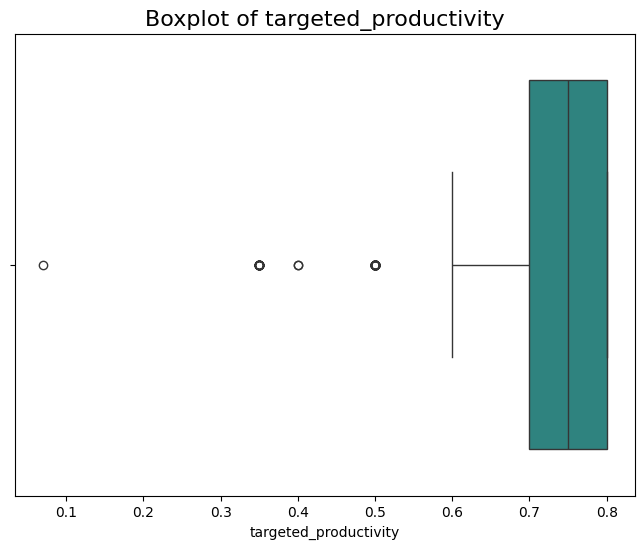

C:\Users\bagas\AppData\Local\Temp\ipykernel_20532\3082638632.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x='wip', palette='viridis')


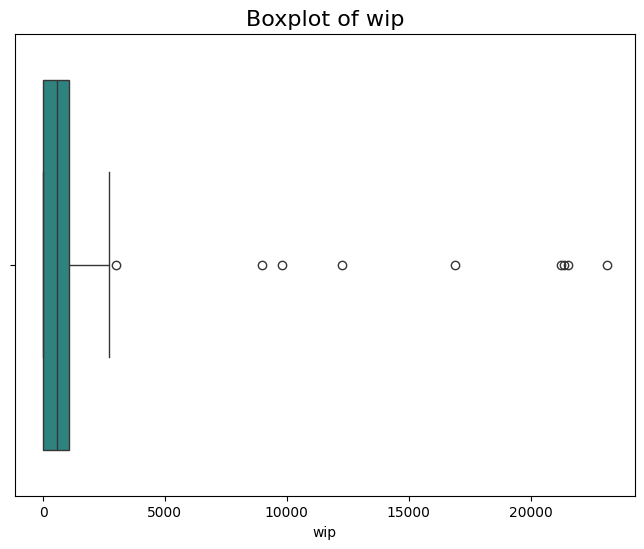

C:\Users\bagas\AppData\Local\Temp\ipykernel_20532\3082638632.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x='over_time', palette='viridis')


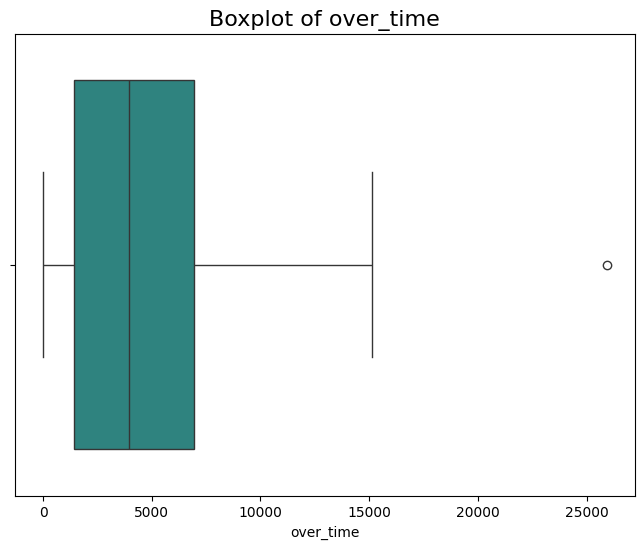

C:\Users\bagas\AppData\Local\Temp\ipykernel_20532\3082638632.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x='incentive', palette='viridis')


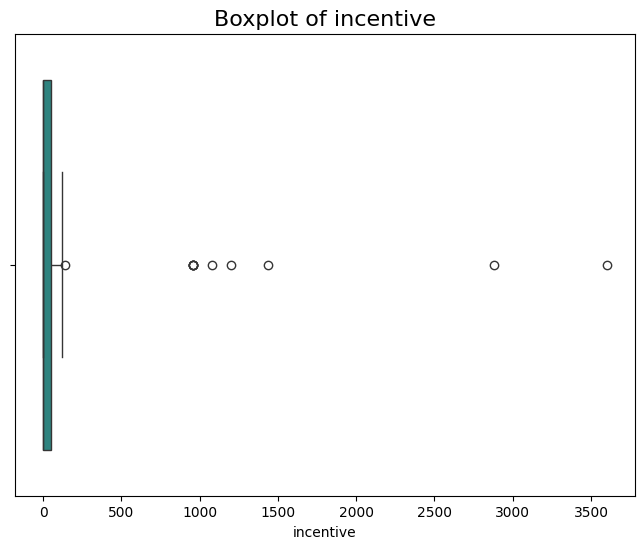

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=dataset, x='targeted_productivity', palette='viridis')
plt.title('Boxplot of targeted_productivity', fontsize=16)
plt.xlabel('targeted_productivity')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=dataset, x='wip', palette='viridis')
plt.title('Boxplot of wip', fontsize=16)
plt.xlabel('wip')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=dataset, x='over_time', palette='viridis')
plt.title('Boxplot of over_time', fontsize=16)
plt.xlabel('over_time')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=dataset, x='incentive', palette='viridis')
plt.title('Boxplot of incentive', fontsize=16)
plt.xlabel('incentive')
plt.show()

These four variables are crucial for proceeding to the modeling stage, so checking and handling outliers is the most important task.

In [24]:
def replace_outliers_with_limits(df, column_name):

    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    df[column_name] = df[column_name].apply(lambda x: lower_limit if x < lower_limit else (upper_limit if x > upper_limit else x))

    return df

In [25]:
columns_to_handle = [
    'targeted_productivity',
    'wip',
    'over_time',
    'incentive'
]

for column in columns_to_handle:
    dataset = replace_outliers_with_limits(dataset, column)

C:\Users\bagas\AppData\Local\Temp\ipykernel_20532\4188652028.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, y=column, palette='viridis')
C:\Users\bagas\AppData\Local\Temp\ipykernel_20532\4188652028.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, y=column, palette='viridis')
C:\Users\bagas\AppData\Local\Temp\ipykernel_20532\4188652028.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, y=column, palette='viridis')
C:\Users\bagas\AppData\Local\Temp\ipykernel_20532\4188652028.py:12: FutureWa

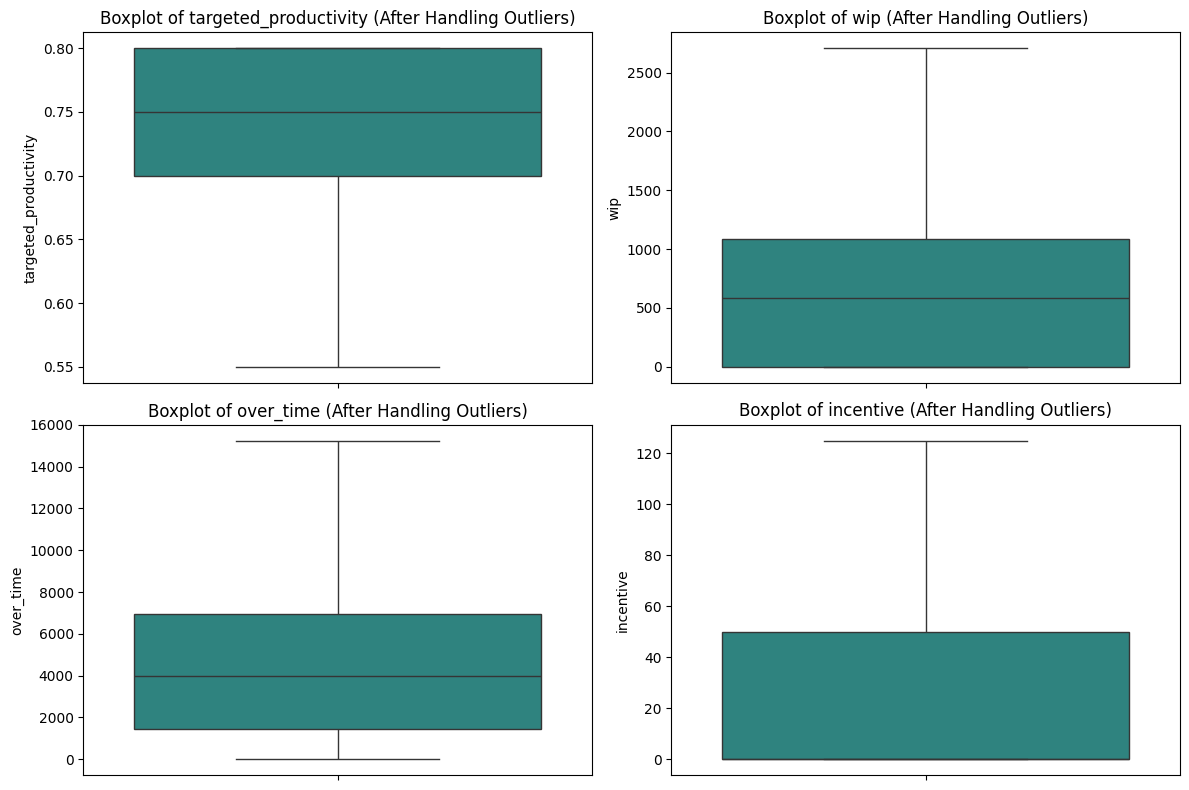

In [26]:
columns_to_handle = [
    'targeted_productivity',
    'wip',
    'over_time',
    'incentive'
]

plt.figure(figsize=(12, 8))

for i, column in enumerate(columns_to_handle, start=1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=dataset, y=column, palette='viridis')
    plt.title(f'Boxplot of {column} (After Handling Outliers)', fontsize=12)
    plt.ylabel(column)
    plt.xlabel('')

plt.tight_layout()
plt.show()

In this visualization, it can be seen that the outliers have been handled using the Interquartile Range (IQR) method to identify and manage outliers. This method works by calculating the range between the first (Q1) and third (Q3) quartiles of the data, then determining the upper and lower bounds. Data points outside these bounds are considered outliers and are replaced with the boundary values.

Variables Correlation

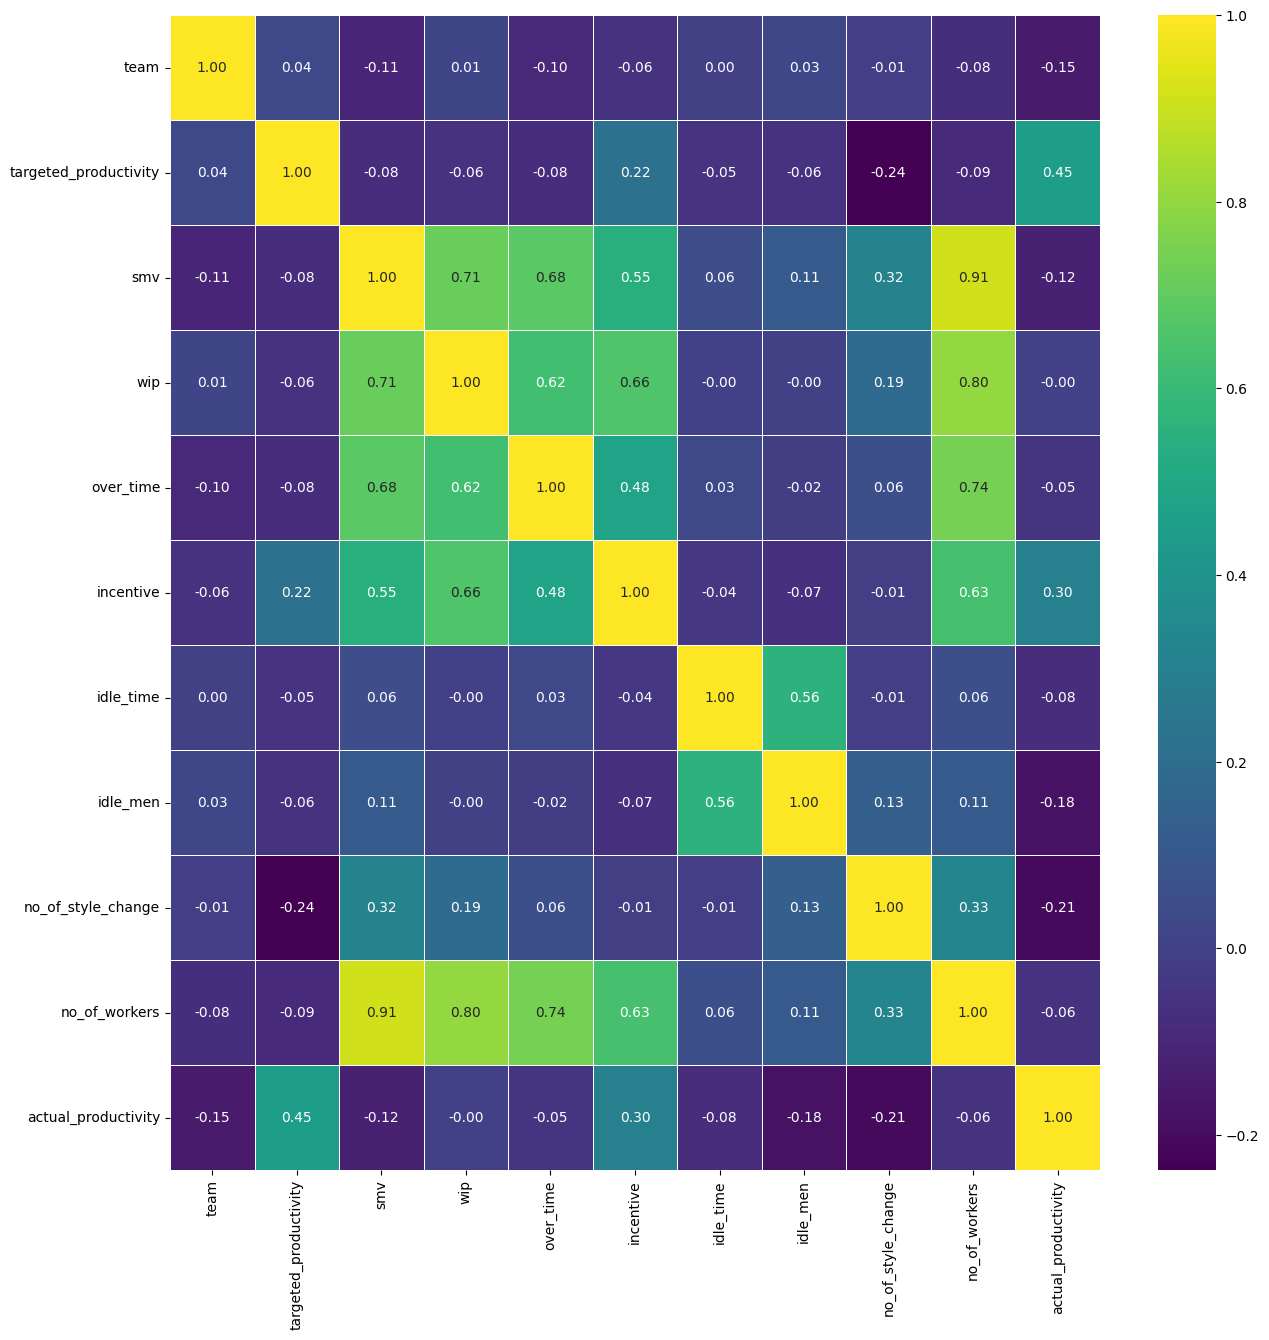

In [27]:
numerical = dataset.select_dtypes(include=['int64', 'float64'])
corrMatrix = numerical.corr()
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corrMatrix, annot=True, linewidths=0.5, ax=ax, cmap='viridis', fmt='.2f', cbar=True)
plt.show()

This correlation visualization explains the relationships between various variables in the dataset. Each cell in the matrix shows the correlation coefficient between two variables, with values ranging from -1 to 1. Here are some examples of the correlations found:

- Actual Productivity and Target: There is a positive correlation between actual productivity and the productivity target, although not very strong. This indicates that, generally, the higher the productivity target set, the higher the achieved productivity.

- Productivity and Overtime: There is a positive correlation between overtime and several productivity metrics, such as WIP (work in progress) and the number of workers. This suggests that increased overtime may be related to a higher workload or efforts to improve productivity.

- Correlation between Incentives and Actual Productivity: This correlation shows a relationship, but the strength and direction of this relationship vary and are influenced by many factors."

Correlation Between Variables vs Actual Productivity

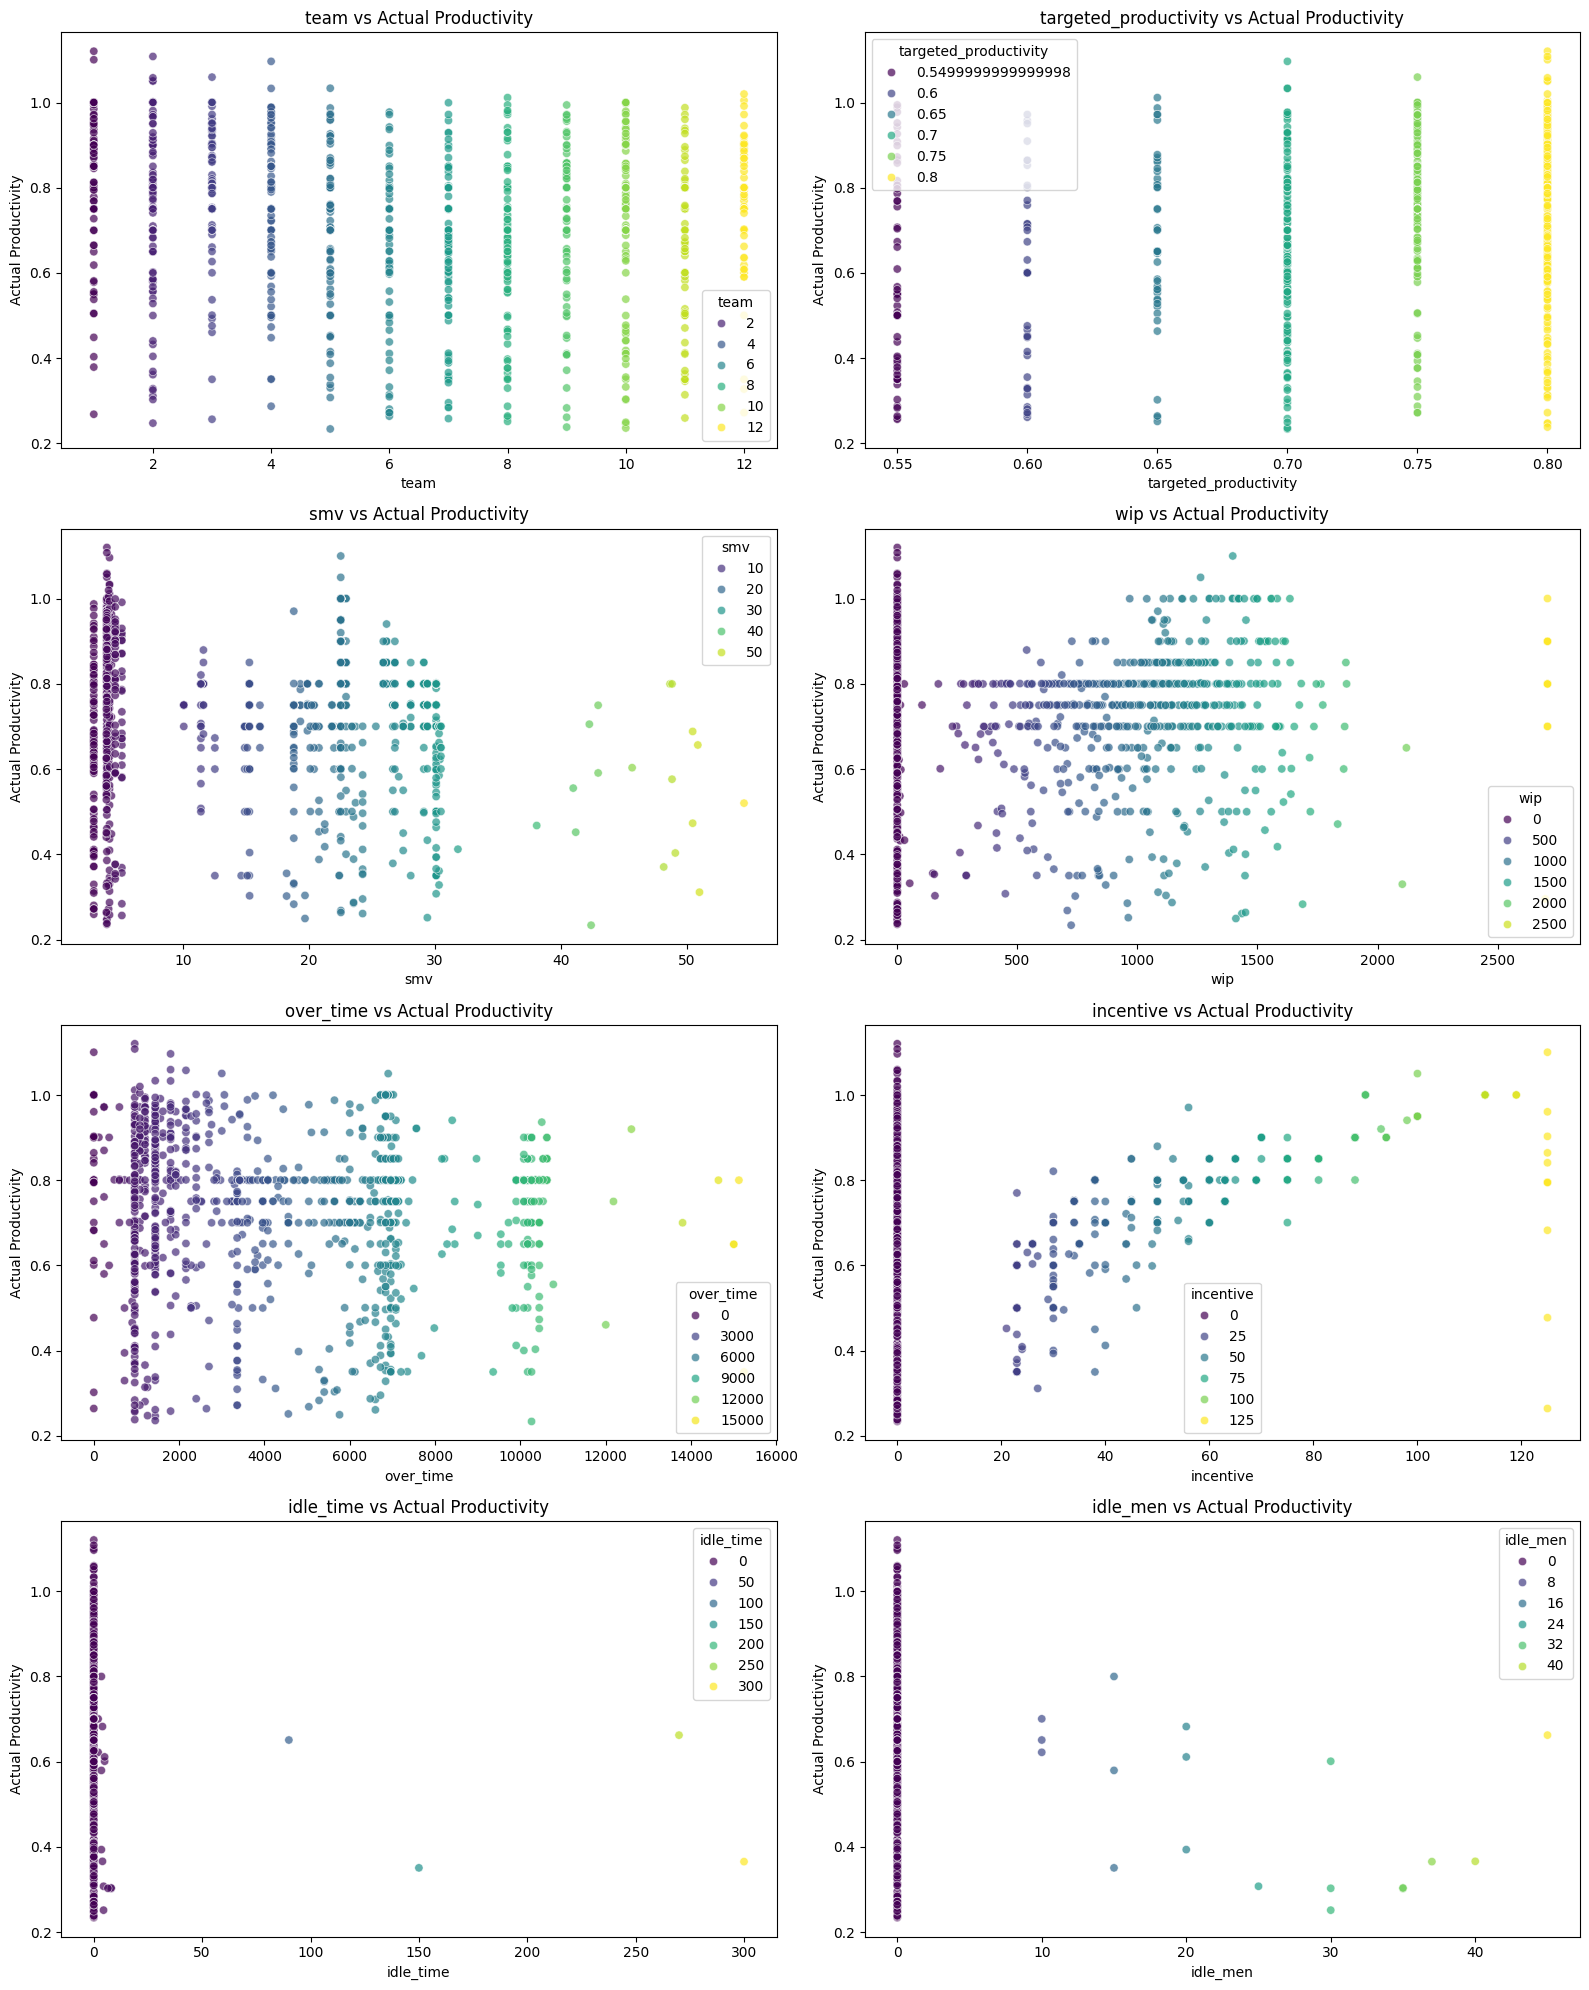

In [28]:
variables = [
    'team',
    'targeted_productivity',
    'smv',
    'wip',
    'over_time',
    'incentive',
    'idle_time',
    'idle_men'
]

plt.figure(figsize=(16, 20))
for i, var in enumerate(variables, start=1):
    plt.subplot(4, 2, i)
    sns.scatterplot(data=dataset, x=var, y='actual_productivity', hue=var, alpha=0.7, palette='viridis')
    plt.title(f'{var} vs Actual Productivity', fontsize=12)
    plt.xlabel(var)
    plt.ylabel('Actual Productivity')

plt.tight_layout()
plt.show()

From the displayed scatter plot, several patterns of relationships between variables and actual productivity can be observed. In general, if the data points form an upward line from the bottom left to the top right, it indicates a positive correlation, meaning that an increase in one variable is followed by an increase in the other variable. Conversely, if the data points form a downward line, it indicates a negative correlation. If the data points are scattered randomly, there is no significant relationship between the two variables.

Some examples:

- Team: It seems that some teams consistently have higher productivity compared to others. This suggests that team factors, such as experience, skills, or motivation, may influence productivity.

- Targeted Productivity: The correlation between targeted productivity and actual productivity is generally positive, although there are some deviations. This indicates that higher targets tend to be associated with higher productivity, but not always.

- Idle Time and Idle Men: Both show a negative correlation with actual productivity, which makes sense because unused time and labor will reduce output.

C:\Users\bagas\AppData\Local\Temp\ipykernel_20532\4218577437.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x='team', y='actual_productivity', palette='viridis')


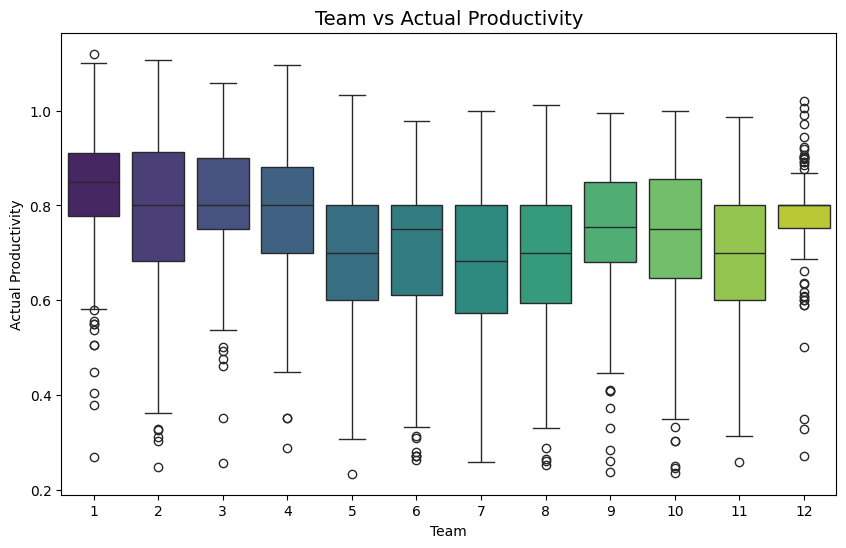

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset, x='team', y='actual_productivity', palette='viridis')
plt.title('Team vs Actual Productivity', fontsize=14)
plt.xlabel('Team')
plt.ylabel('Actual Productivity')
plt.show()

The box plot analysis shows significant differences in productivity between teams. The team in yellow (team 12) consistently demonstrates the best performance with the highest average productivity. Conversely, the teams in dark purple (teams 1 and 2) tend to have lower productivity. However, it is important to note that there is individual productivity variation within each team. This indicates that, in addition to team factors, individual factors or other variables specific to each team member also influence performance